# Thema (C)NN werkcollege 1
### Objectherkenning met een neuraal netwerk

In dit college gaan we bezig met het voorspellen van afbeeldingen m.b.v. een simpel neuraal netwerk. We gebruiken de theorie uit de kennisbasis en gaan deze stapsgewijs toepassen op deze casus. Benodigde voorbereiding van deze les is het bestuderen van les 1 uit de kennisbasis en het installeren van Keras.

Nu is het herkennen van 10 mogelijke handgeschreven cijfers zoals in de uitleg op de elo relatief simpel, vooral omdat we geen andere informatie in het plaatje hebben dan alleen het cijfer. We gaan het daarom hier een klein beetje ingewikkelder maken en gebruiken hier de bij Keras meegeleverde CIFAR-10 dataset. Deze dataset bevat 60.000 afbeeldingen (50.000 train en 10.000 test) verdeeld over 10 verschillende klassen ['vliegtuig', 'auto', 'vogel', 'kat', 'hert','hond', 'kikker', 'paard', 'boot', 'vrachtwagen']. Iedere klasse bevat 6.000 afbeeldingen van 32 bij 32 pixels.

## Business understanding
In dit geval hebben we geen heel expliciete vraag uit de business maar in diverse disciplines is het van belang om verschillende vaak context specifieke objecten te kunnen herkennen. Denk bijv aan een autonoom rijdende auto die een fiets van een motor moet kunnen onderscheiden om de snelheid goed te kunnen inschatten

## Data understanding
We beginnen met het importeren van Keras en de dataset:

In [2]:
#import data (code gegeven)
from tensorflow.keras import datasets, layers, models
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

print(train_images.shape)
print(train_labels.shape)

(50000, 32, 32, 3)
(50000, 1)


In [28]:
import numpy as np
train_images: np.array = train_images
train_labels: np.array = train_labels

train_labels[0]

array([6], dtype=uint8)

Als alles goed is gegaan kunnen we zien dat train-images betaat uit 50.000 images van 32 x 32 pixels met 3 kleurkanalen. Voor de zekerheid controleren we alles nog even door de 1e 25 images weer te geven met pyplot en hier het juiste label in tekst onder te zetten. 

TypeError: Invalid shape (3072,) for image data

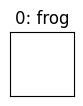

In [27]:
# %matplotlib inline
#toon de 1e 25 plaatjes met bijbehorende label (10 min)
from matplotlib import pyplot as plt

class_names = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

plt.figure()

train_images_copy = train_images_copy.copy()

for i in range (0, 25):
    plt.subplot(5, 5, i+1)
    plt.title(str(i) + ": " + class_names[train_labels[i][0]])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images_oef[i])

plt.show()


## Data preparation

Nu we de data hebben ingelezen en hopelijk ook begrijpen kunnen we beginnen met de data preparation. Een neuraal netwerk bestaat uit 1 of meerdere Dense layers die een genormaliseerde vector verwachten.   

In [3]:
#Normaliseer de data en reshape de data naar een vector (10 min)
test_images_or = train_images_copy.copy()


In [15]:
#Normaliseer de data en reshape de data naar een vector (10 min)
test_images_or = train_images_copy.copy()


# Normaliseren
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshapen
WIDTH = 32
HEIGHT = 32
CHANNELS = 3
VECTOR_SIZE = WIDTH * HEIGHT * CHANNELS

train_images = train_images.reshape((50000, VECTOR_SIZE))
test_images = test_images.reshape((10000, VECTOR_SIZE))
train_images.shape

(50000, 3072)

Als het goed is hebben we nu 50.000 en 10.000 vectoren van 3072 (32x32x3) waarden. 

## Modeling
Nu kunnen we beginnen met het bouwen van ons eerste model wat hopelijk beter presteert dan volslagen willekeur. Omdat we toch ergens mee moeten beginnen nemen we het model uit de kennisbasis met twee hidden Dense layers van elk 16 neurons en relu als activation function als uitgangspunt. Zoek in de kennisbasis op hoeveel neurons de laatste laag moet hebben en wat de meest geschikte activation function voor de laatste laag is.

In [10]:
#definieer het model (10 min) en geef de summary.

model = models.Sequential([
    layers.Dense(16, activation="relu", input_shape=(VECTOR_SIZE, )),
    layers.Dense(16, activation="relu"),
    layers.Dense(10, activation="softmax"),
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 16)             │        49,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 49,610 (193.79 KB)

 Trainable params: 49,610 (193.79 KB)

 Non-trainable params: 0 (0.00 B)

Compile het model met de juiste optimizer, loss-functie en metrics

In [13]:
#compile het model (2 min)
model.compile(optimizer="ADAM",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

Fit het model met de juiste datasets. Train 25 epochs. Bewaar de resultaten in een variabele (bijv history)

In [17]:
#fit model (5 min)
history = model.fit(train_images, train_labels, epochs=25, batch_size=25,
                    validation_data=(test_images, test_labels))

Epoch 1/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.0998 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.1002 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 3/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.0981 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 4/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.0997 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 5/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.1001 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 6/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.0965 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 7/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.1006 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 8/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.0994 - lo

## Evaluation
Op basis van bovenstaande output kun je al concluderen dat ons model het nog niet heel erg goed doet. Voor de volledigheid plotten we de accurary en validated accuracy per epoch nog.

Text(0, 0.5, 'Accuracy')

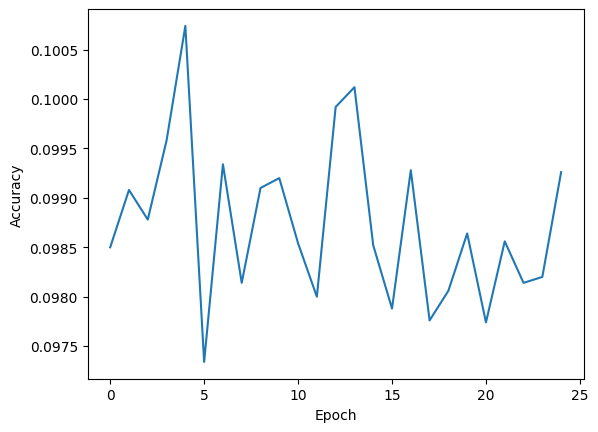

In [20]:
from matplotlib import pyplot as plt

plt.plot(history.history["accuracy"], label="accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")


We zien hier dat ons model het beter doet dan willekeur maar erg gelukkig worden we er nog niet van. Blijkbaar is het herkennen van hertjes en vliegtuigen toch wat complexer dan alleen maar cijfers herkennen (in de kennisbasis kwamen we met dit model al rond de 98 procent uit) We gaan daarom kijken of we niet wat hogere scores kunnen bereiken door extra layers en neurons toe te voegen.

## Modeling


In [22]:
# Verschillende opties uitproberen (ca 20 min)
# denk aan extra lauers en meer neurons.

# plt.plot(history.history["val_accuracy"], label="val_accuracy")


model = models.Sequential([
    layers.Dense(16, activation="relu", input_shape=(VECTOR_SIZE, )),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(10, activation="softmax"),
])


/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
#compile
model.compile(optimizer="ADAM",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])


In [24]:
#fit model
history = model.fit(train_images, train_labels, epochs=25, batch_size=25,
                    validation_data=(test_images, test_labels))


Epoch 1/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.1004 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 2/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.1004 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 3/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.0994 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 4/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.1019 - loss: 2.3027 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 5/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.1036 - loss: 2.3026 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 6/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.0982 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3027
Epoch 7/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.0956 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3026
Epoch 8/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.0981 -

## Evaluation: 

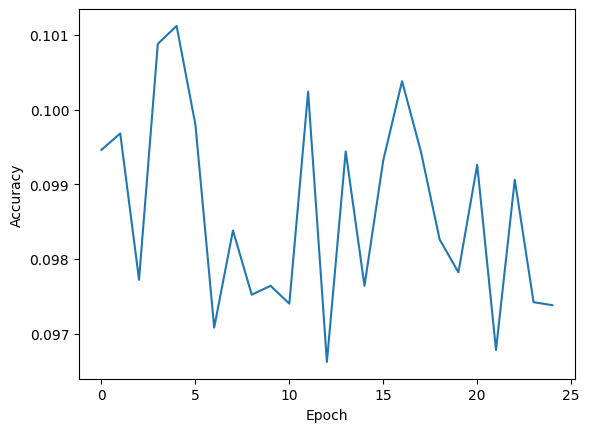

In [25]:
#plot de accuracy en validated accuracy
plt.plot(history.history["accuracy"], label="accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.show()


We zien nu dat het model langzamerhand wat beter begint te presteren, om beter te begrijpen waar het mis gaat gaan we eerst de confusion matrix afdrukken.

In [12]:
#print de confusion matrix (20 min) op basis van de test_data

# Tip: standaard krijg je per afbeelding een array met 10 waarden terug (1 per klasse).
# De hoogste waarde hiervan is de klasse (auto, vliegtuig etc.) met de grootste kans.
# Hiervoor kun je argmax() gebruiken


De confusion matrix geeft ons al heel veel inzicht in wat er precies misgaat (Bijvoorbeeld dat relatief veel auto's voor een vrachtauto worden aangezien.) Soms helpt het echt ook om dingen te visualiseren. Daarom printen we de 1e 25 test afbeeldingen met hierbij de door ons model voorspelde waarden.

In [13]:
#print de 1e 25 plaatjes uit test_images en daarbij de voorspelde waarde. (15 min)


We zien nu een model wat ca de helft van de gevallen goed weet te voorspellen. Dit is al heel wat maar misschien nog niet helemaal wat we willen. Nu zien we ook (zeker als we meer epochs gaan draaien) dat het model ook steeds meer gaat overfitten. Probeer daarom verschillende waarden voor l1 en l2 om dit te voorkomen, zonder meteen je val_accuracy te laten instorten.  

## Modeling

In [14]:
#Probeer verschillende l1 en l2 waarden bij verschillende lagen (20 min)


In [15]:
#compile

In [16]:
#fit model


## Evaluation

In [17]:
#plot de accuracy en validated accuracy


Over het algemeen zien we dat het toevoegen van de regulators het overfitten wel beperkt maar in dit geval al snel ten koste van de (validated) accuracy gaat

## Modeling / Evaluation
Probeer nu nog eens door wat meer te variëren in je netwerk je de val_accuracy nog wat op te krikken. Denk aan extra Denselayers, extra neurons etc. Het best scorende resultaat zullen we het laatste kwartier van de les bespreken. Eén spelregel, we gebruiken alleen Dense layers!

In [30]:
#meest optimale gevonden oplossing.
from keras import regularizers

model = models.Sequential([
    layers.Dense(128, kernel_regularizer=regularizers.l1(0.01), activation="relu", input_shape=(VECTOR_SIZE, )),
    layers.Dense(128, activation="relu"),
    layers.Dense(, activation="softmax"),
])


model.compile(optimizer="ADAM",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
history_regulated = model.fit(train_images, train_labels, epochs=25, batch_size=64,
                    validation_data=(test_images, test_labels))


/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.0984 - loss: 4.4799 - val_accuracy: 0.1000 - val_loss: 2.4237
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.0982 - loss: 2.4243 - val_accuracy: 0.1000 - val_loss: 2.4232
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.0982 - loss: 2.4242 - val_accuracy: 0.1000 - val_loss: 2.4256
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.0976 - loss: 2.4244 - val_accuracy: 0.1000 - val_loss: 2.4227
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.1036 - loss: 2.4242 - val_accuracy: 0.1000 - val_loss: 2.4254
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.1011 - loss: 2.4244 - val_accuracy: 0.1000 - val_loss: 2.4239
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.0958 - loss: 2.4243 - val_accuracy: 0.1000 - val_loss: 2.4249
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.0977 - loss: 2.4243 - val_acc

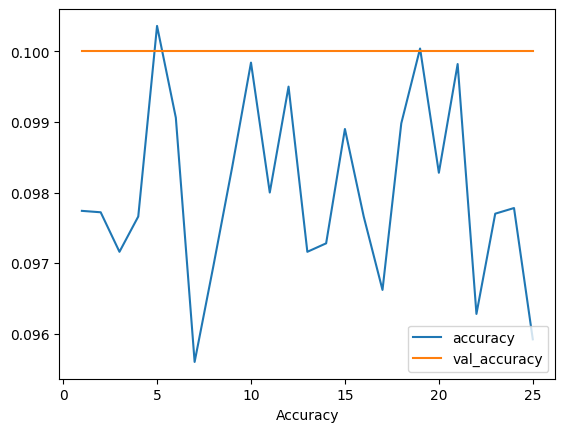

In [35]:
# #plot de accuracy en validated accuracy
# plt.plot(history_regulated.history["accuracy"], label="accuracy")
# plt.xlabel("Epoch")
# plt.ylabel("Accuracy")

# plt.show()


acc=history_regulated.history['accuracy']
val_acc=history_regulated.history['val_accuracy']
epochs=range(1, len(acc) + 1)
plt.plot(epochs, acc, label='accuracy')
plt.plot(epochs, val_acc, label='val_accuracy')
plt.xlabel('Epoch')
plt.xlabel('Accuracy')
plt.legend(loc='lower right')


/opt/anaconda3/envs/tf/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.0981 - loss: 2.8760 - val_accuracy: 0.1000 - val_loss: 2.3531
Epoch 2/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.0983 - loss: 2.3536 - val_accuracy: 0.1000 - val_loss: 2.3537
Epoch 3/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.0989 - loss: 2.3536 - val_accuracy: 0.1000 - val_loss: 2.3537
Epoch 4/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.0975 - loss: 2.3536 - val_accuracy: 0.1000 - val_loss: 2.3530
Epoch 5/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.0972 - loss: 2.3536 - val_accuracy: 0.1000 - val_loss: 2.3537
Epoch 6/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.0980 - loss: 2.3535 - val_accuracy: 0.1000 - val_loss: 2.3528
Epoch 7/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.1014 - loss: 2.3535 - val_accuracy: 0.1000 - val_loss: 2.3536
Epoch 8/25
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.0958 -

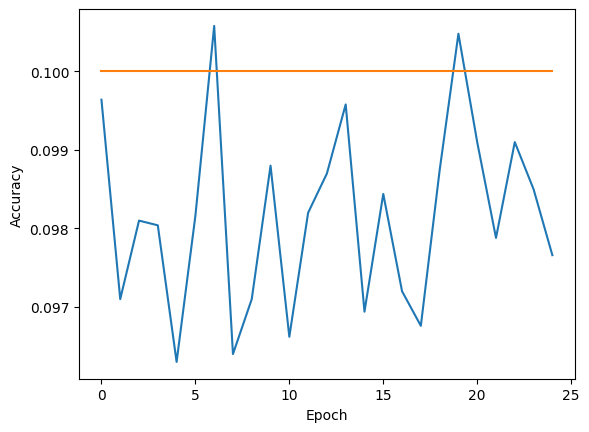

In [37]:
from tensorflow import keras

model = keras.Sequential([
    layers.Dense(128, activation="relu", input_shape=(VECTOR_SIZE, ), kernel_regularizer=regularizers.l1(0.001)),
    layers.Dense(128, activation="relu", kernel_regularizer=regularizers.l1(0.001)),
    layers.Dense(10, activation="softmax"),
])

model.compile(optimizer="ADAM",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

history = model.fit(train_images, train_labels, epochs=25, batch_size=25,
                    validation_data=(test_images, test_labels))

plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.show()

In hoeverre is een dergelijk neuraal netwerk geschikt om objecten te herkennen en waarom? (geef je antwoord hieronder)